<a href="https://colab.research.google.com/github/shrishpellakur00/Sentimental-Analysis-using-Yelp-Reviews/blob/main/Sentiment_Analysis_in_Yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Performing Sentimental Analysis in Yelp 

###Importing the Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Importing the Dataset

In [ ]:
df = pd.read_csv('sample_data/yelp.csv')

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2.0,5.0,0.0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0.0,0.0,0.0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0.0,1.0,0.0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1.0,2.0,0.0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0.0,0.0,0.0


###Visualizing the dataset

In [ ]:
# Adding a column length to determine the length of each review

df['length'] = df['text'].apply(len)

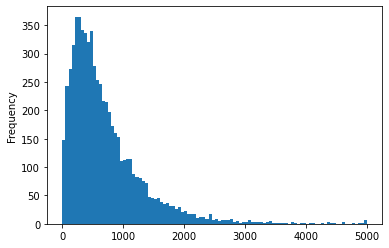

In [ ]:
# Creating a historgram to see the number of words in reviews

df['length'].plot(bins=100, kind = 'hist');

In [ ]:
df['length'].describe()

count    6498.000000
mean      708.454601
std       621.748569
min         1.000000
25%       290.000000
50%       535.000000
75%       928.000000
max      4997.000000
Name: length, dtype: float64

In [ ]:
# Getting the longest text

df[df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [ ]:
df[df['length']==1]['text'].iloc[0]

'X'

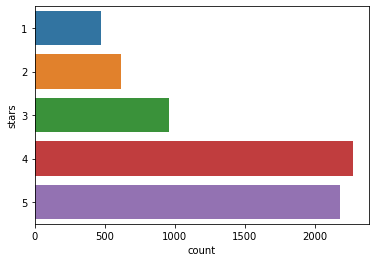

In [ ]:
# Counting the number of reviews based on stars

sns.countplot(y = 'stars', data = df);

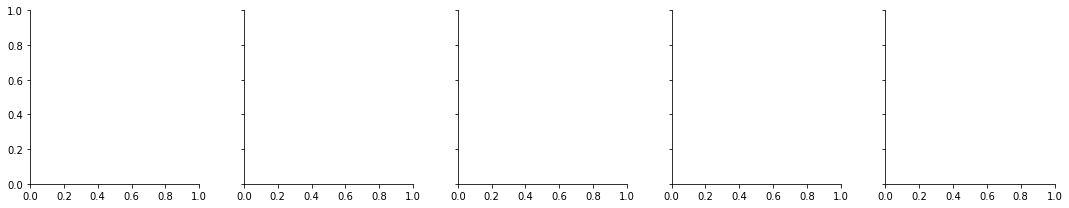

In [ ]:
# Plotting a graph to see how many words are in average per average stars

g = sns.FacetGrid(data = df, col = 'stars', col_wrap = 5)

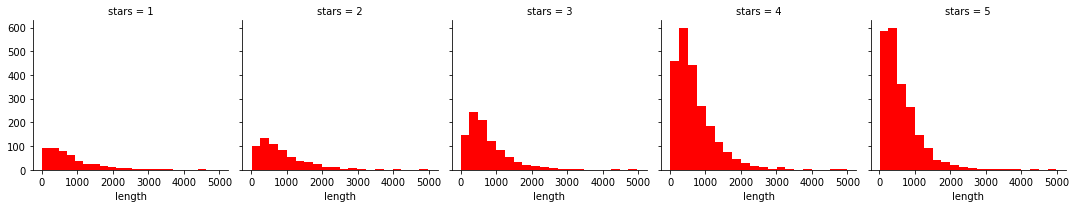

In [ ]:
g = sns.FacetGrid(data = df, col = 'stars', col_wrap = 5)
g.map(plt.hist, 'length', bins = 20, color='r');

In [ ]:
# Obtaining all the reviews with 1 star and saving them in a separate dataframe

df1 = df[ df['stars'] == 1]

In [ ]:
# Obtaining all the reviews with n star and saving them in a separate dataframe

df2 = df[ df['stars'] == 2]
df3 = df[ df['stars'] == 3]
df4 = df[ df['stars'] == 4]
df5 = df[ df['stars'] == 5]

In [ ]:
# Comparing between 1 and 5 star reviews by concatenating them in one dataframe

df15 = pd.concat([ df1, df5 ]);

In [ ]:
print('1-star review percentage = ', len(df1)/len(df15),'%');

1-star review percentage =  0.17818044545111364 %


In [ ]:
print('5-star review percentage = ', len(df5)/len(df15),'%');

5-star review percentage =  0.8218195545488863 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


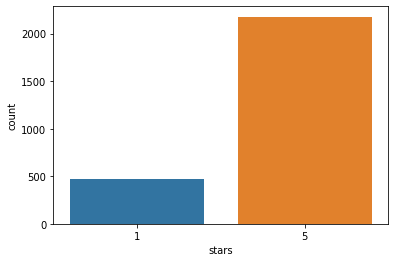

In [ ]:
# Plotting these values in a countplot

sns.countplot(df15['stars']);

###Removing Punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

###Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Applying them both to our data

def message_cleaning(message):
  Test_punc_removed = [ char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed);
  Test_punc_removed_clean = [ word for word in Test_punc_removed_join.split() if word not in stopwords.words('english')]
  return Test_punc_removed_clean

In [ ]:
df_clean = df15['text'].apply(message_cleaning)

In [ ]:
print(df_clean[0]) # Cleaned Review

['My', 'wife', 'took', 'birthday', 'breakfast', 'excellent', 'The', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'Our', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'It', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'Do', 'favor', 'get', 'Bloody', 'Mary', 'It', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'It', 'amazing', 'While', 'EVERYTHING', 'menu', 'looks', 'excellent', 'I', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'It', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'It', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'I', 'cant', 'wait', 'go', 'back']


In [ ]:
print(df15['text'][0]) # Original Review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


### Applying Count Vectorizer to the data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( analyzer = message_cleaning)
yelp_cv = vectorizer.fit_transform(df15['text'])

In [ ]:
# Converting them to array
yelp_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Building a Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBClassifier = MultinomialNB()
label = df15['stars'].values

In [ ]:
NBClassifier.fit(yelp_cv, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Dividing the dataset into trainng and testing data

In [ ]:
X = yelp_cv
y = label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2);

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBClassifier = MultinomialNB()
NBClassifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluating the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NBClassifier.predict(X_train)
y_predict_train

array([5, 5, 5, ..., 5, 5, 5])

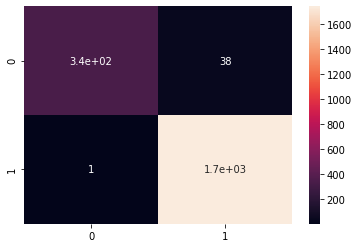

In [ ]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)